# Kalman Filter

In [1]:
# Load Pkgs
import numpy as np

from KFClass import LinearGaussianModel

## Case1 Linear Gaussian Model
> let $x \in \mathbb{R}$ and $y \in \mathbb{R}$.

For the real data generation, we should clear out our model (here are dynamic model and measurement model). Usually, these 2 models have the general form (in each timestep k):
$$
x_k = f(x_{k-1}) + q_{k-1}, \\
y_k = h(x_k) + r_k,
$$

Where $q, r \sim \mathcal{N}(0, \Sigma)$.

In case1, we set $f(\cdot) = A \in \mathbb{R}^{1 \times 1}, h(\cdot) = H \in \mathbb{R}^{1 \times 1}$, which means:
$$
x_k = A \cdot x_{k-1} + q_{k-1}, \\
y_k = H \cdot x_k + r_k.
$$

1. Set Up Hyperparameters

In [2]:
A = np.array([[1.]])
H = np.array([[1.]])
Sigma_q = np.diag([0.1])
Sigma_r = np.diag([0.1])

KF = LinearGaussianModel(
        A=A,
        Sigma_q=Sigma_q,
        H=H,
        Sigma_r=Sigma_r
    )

2. Generate Measurements

In [3]:
# Set up model parameters
mu = np.array([0])
Sigma_p = np.diag([0.1])

samples = KF.generate_measurement(
    mu=mu,
    Sigma_p=Sigma_p
)

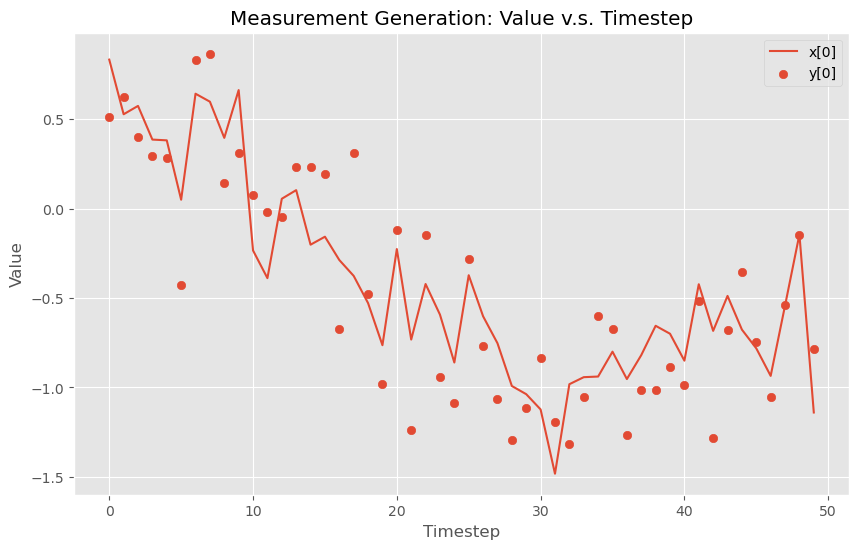

In [4]:
# Visualization
KF.plot_generated_measurement()

3. Kalman Filter Estimation

In [5]:
results = KF.kf_estimation(
        mu=mu,
        Sigma_p=Sigma_p
    )

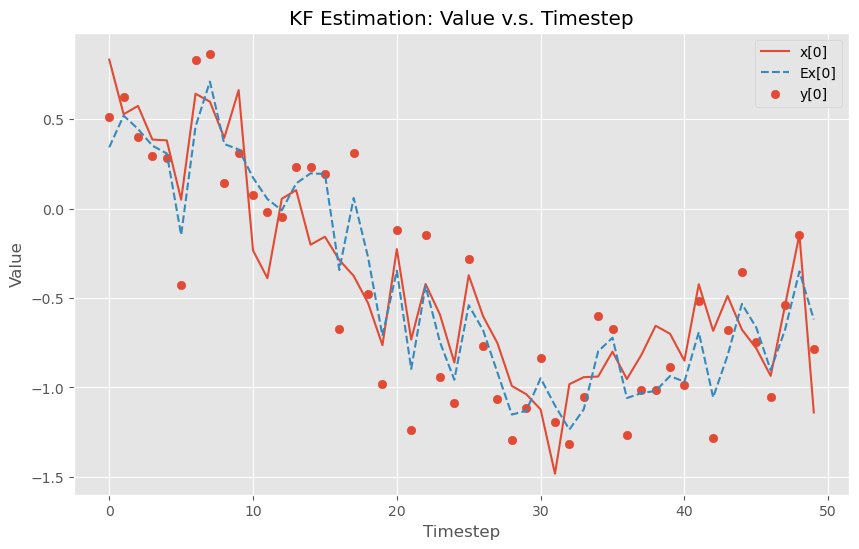

In [6]:
# Visualiztion
# X is real data, Y is measurement, EX is the resuilt of Kalman Filter Algorithm
KF.plot_kf_estimation(X_display=True)

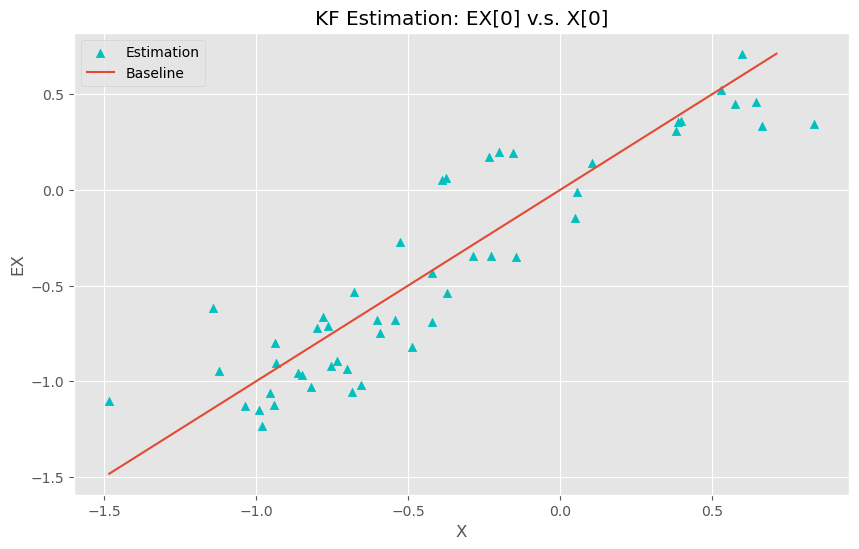

In [7]:
# Baseline is y=x
KF.plot_EX_versus_X()

## Case2 Linear Gaussian Model
> let $x \in \mathbb{R}^2$ and $y \in \mathbb{R}^2$.

In case2, we set $f(\cdot) = A \in \mathbb{R}^{2 \times 2}, h(\cdot) = H \in \mathbb{R}^{2 \times 2}$, which means:
$$
x_k = A \cdot x_{k-1} + q_{k-1}, \\
y_k = H \cdot x_k + r_k.
$$

1. Set Up Hyperparameters

In [8]:
A = np.array([[1.0, 0.1], [0.0, 1.0]])
H = np.array([[1.1, 0.0], [0.0, 0.9]])
Sigma_q = np.diag([0.1, 0.1])
Sigma_r = np.diag([0.1, 0.1])

# Initialize the Kalman Filter model
KF = LinearGaussianModel(
    A=A,
    Sigma_q=Sigma_q,
    H=H,
    Sigma_r=Sigma_r
)

2. Generate Measurements

In [9]:
mu = np.array([0, 0])
Sigma_p = np.diag([0.1, 0.1])

# Generate synthetic measurements
samples = KF.generate_measurement(
    mu=mu,
    Sigma_p=Sigma_p,
    total_timesteps=50  # Number of timesteps to generate data for
)

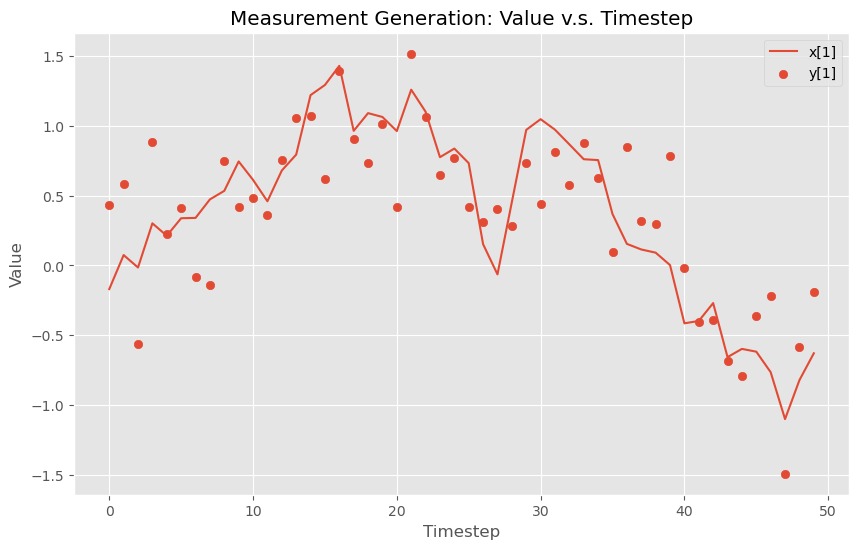

In [10]:
# KF.plot_generated_measurement(k=0)  # Plot for the first dimension
KF.plot_generated_measurement(k=1)  # Plot for the second dimension

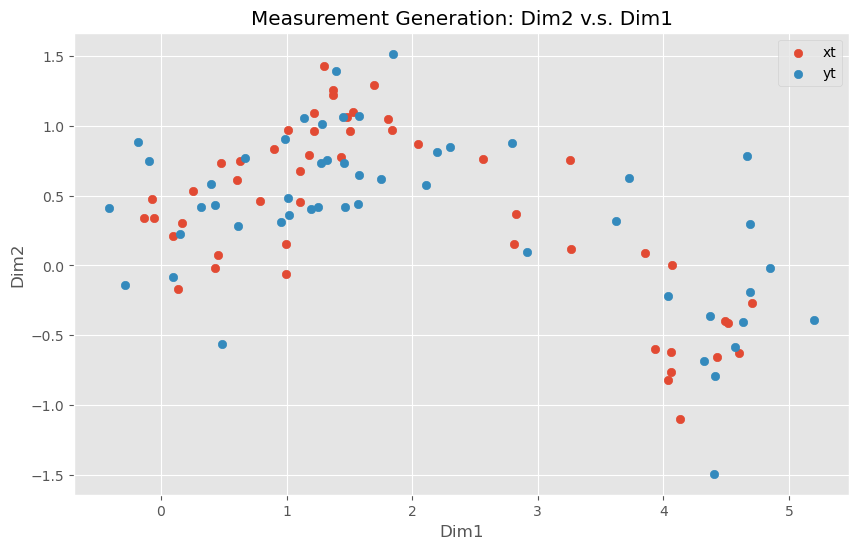

In [11]:
# Plot the generated measurements in scatter
KF.plot_generated_measurement_scatter()

3. Kalman Filter Estimation

In [12]:
estimation_results = KF.kf_estimation(
        mu=mu,
        Sigma_p=Sigma_p
    )

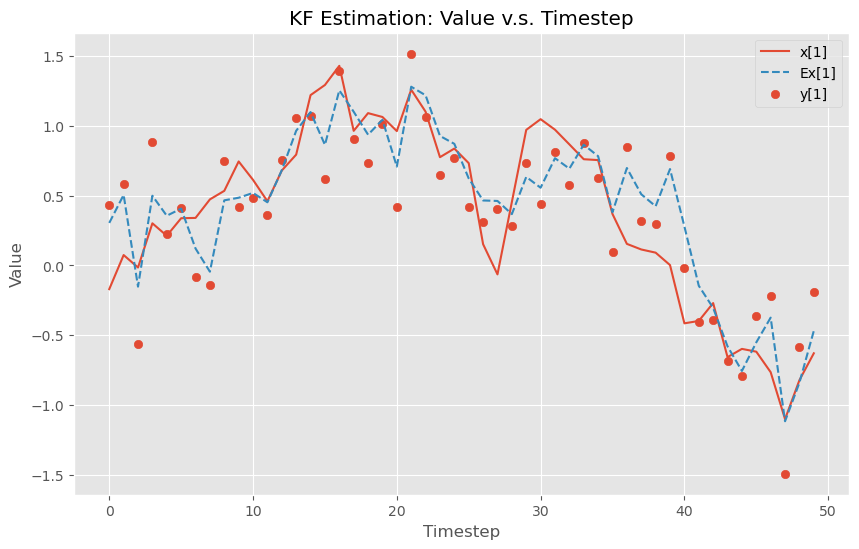

In [13]:
# Plot the Kalman Filter estimation
# KF.plot_kf_estimation(k=0, X_display=True)  # Plot estimation for the first dimension
KF.plot_kf_estimation(k=1, X_display=True)  # Plot estimation for the second dimension

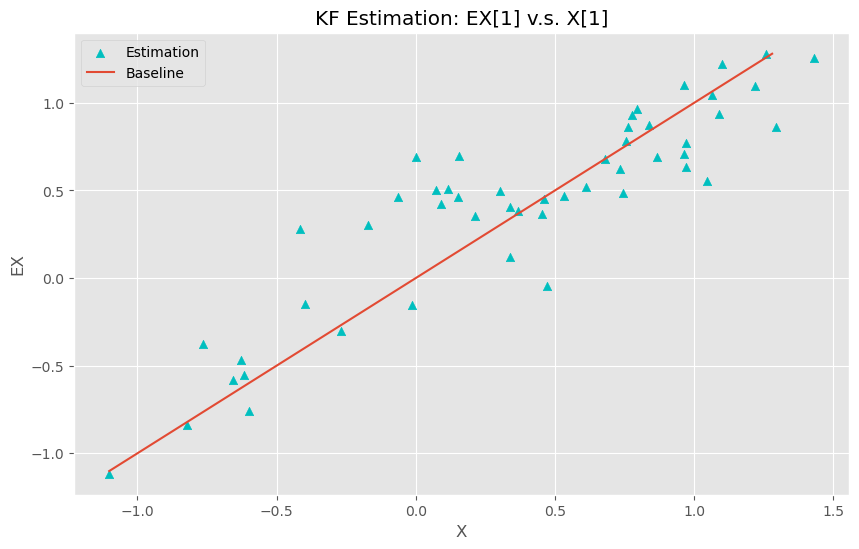

In [14]:
# Compare estimated state vs true state
# Again, the Baseline is y=x
# KF.plot_EX_versus_X(k=0)  # For the first dimension
KF.plot_EX_versus_X(k=1)  # For the second dimension